<a href="https://colab.research.google.com/github/raihan-tanvir/bengali-hwcr/blob/master/bhwcr_cmaterdb_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from PIL import Image
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
!wget https://www.dropbox.com/s/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
!unrar x CMATERdb\ 3.1.2.rar -idq

--2020-09-17 07:50:29--  https://www.dropbox.com/s/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar [following]
--2020-09-17 07:50:29--  https://www.dropbox.com/s/raw/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e46337255a4a161ecf9f85b13.dl.dropboxusercontent.com/cd/0/inline/A_h47iqNwjTJl_ikyG-Zw406HHV4QvzYcRSVa4aKUldcmCTdPknlHGORBGlQg3WCLnfVw3J3tJClXxbEO4LV9RNOTQaHPMMDfUgs5e1rEU-w8g/file# [following]
--2020-09-17 07:50:30--  https://uc1e46337255a4a161ecf9f85b13.dl.dropboxusercontent.com/cd/0/inline/A_h47iqNwjTJl_ikyG-Zw406HHV4QvzYcRSVa4aKUldcmCTdPknlHGORBGlQg3WCLnfVw3J3tJClXxbEO4LV9RNOTQaHPMMDfUgs5e1rEU-w

In [4]:
train_path = os.getcwd()+'/BasicFinalDatabase/Train'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(train_path))]
label_map = ['অ','আ','ই ','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ',
             'ক','খ','গ','ঘ','ঙ',
             'চ','ছ','জ','ঝ','ঞ', 
             'ট','ঠ','ড','ঢ','ণ',
             'ত','থ','দ','ধ','ন',
             'প','ফ','ব','ভ','ম',
             'য','র','ল',
             'শ','ষ','স','হ',
             'য়','ড়','ঢ়','ৎ','ং','ঃ','ঁ']
Temp = []
for folder in folders:
    
    images = os.listdir((train_path+folder))
    temp = []
    for image in images:
      try:
        img = Image.open(train_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        #arr = np.true_divide(arr,[255.0],out=None)
        arr = arr / 255.0
        Temp.append(arr)
      except:
        continue
X_orig = np.stack(Temp)
print(X_orig.shape)
print(np.mean(X_orig))
print(np.std(X_orig))

(12000, 32, 32, 1)
0.4185758996502239
0.2384894180820233


In [5]:
Y_orig = []
[Y_orig.extend([bc]*240) for bc in range(len(label_map))]
Y_orig = np.stack(Y_orig)
Y_orig = keras.utils.to_categorical(Y_orig, len(np.unique(Y_orig)))
print(Y_orig)

In [6]:
indices = np.arange(X_orig.shape[0])
np.random.shuffle(indices)
X_orig = X_orig[indices]
Y_orig = Y_orig[indices]

print(X_orig.shape,Y_orig.shape)

(12000, 32, 32, 1) (12000, 50)


In [7]:

test_path = os.getcwd()+'/BasicFinalDatabase/Test'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(test_path))]

Temp2 = []
for folder in folders:
    images = os.listdir((test_path+folder))
    for image in images:
      try:
        img = Image.open(test_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        #arr = np.true_divide(arr,[255.0],out=None)
        arr = arr / 255.0
        Temp2.append(arr)
      except:
        continue

X_test = np.stack(Temp2)
print(X_test.shape)

(3000, 32, 32, 1)


In [8]:
Y_test = []
[Y_test.extend([bc]*60) for bc in range(len(label_map))]
Y_test = np.stack(Y_test)
Y_test = keras.utils.to_categorical(Y_test, len(np.unique(Y_test)))
print(Y_test.shape)

(3000, 50)


In [9]:
indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

print(X_test.shape,Y_test.shape)

(3000, 32, 32, 1) (3000, 50)


In [10]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X_orig, Y_orig, test_size=0.2, shuffle=False)
X_train.shape,Y_train.shape,X_dev.shape,Y_dev.shape

((9600, 32, 32, 1), (9600, 50), (2400, 32, 32, 1), (2400, 50))

In [33]:
bs=64
ep=20
drop_prob=0.2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_prob))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='softmax'))

opt = keras.optimizers.Adam()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
          batch_size=bs,
          epochs=ep,
          verbose=1,
          validation_data=(X_dev, Y_dev))
print(history)

Epoch 1/20
150/150 [==============================] - 12s 81ms/step - loss: 3.0331 - accuracy: 0.2208 - val_loss: 1.7796 - val_accuracy: 0.4904
Epoch 2/20
150/150 [==============================] - 12s 80ms/step - loss: 1.3200 - accuracy: 0.6332 - val_loss: 1.0383 - val_accuracy: 0.6992
Epoch 3/20
150/150 [==============================] - 12s 80ms/step - loss: 0.8580 - accuracy: 0.7516 - val_loss: 0.8578 - val_accuracy: 0.7462
Epoch 4/20
150/150 [==============================] - 12s 79ms/step - loss: 0.6578 - accuracy: 0.8096 - val_loss: 0.7357 - val_accuracy: 0.7808
Epoch 5/20
150/150 [==============================] - 12s 79ms/step - loss: 0.5219 - accuracy: 0.8431 - val_loss: 0.6261 - val_accuracy: 0.8171
Epoch 6/20
150/150 [==============================] - 12s 79ms/step - loss: 0.4276 - accuracy: 0.8700 - val_loss: 0.5861 - val_accuracy: 0.8246
Epoch 7/20
150/150 [==============================] - 12s 79ms/step - loss: 0.3512 - accuracy: 0.8952 - val_loss: 0.5438 - val_accuracy:

In [41]:
from datetime import datetime
now = str(datetime.now())

project_dir = '/content/drive/Shared drives/4.2/SoftcomProject/bhwcr-cmaterdb-keras/'

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights(project_dir+"/model_"+str(ep)+"_"+str(bs)+"_"+now+".h5")

Saved model to disk


In [42]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

94/94 [==============================] - 1s 12ms/step - loss: 0.6195 - accuracy: 0.8650
Test loss: 0.6195052266120911
Test accuracy: 0.8650000095367432


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


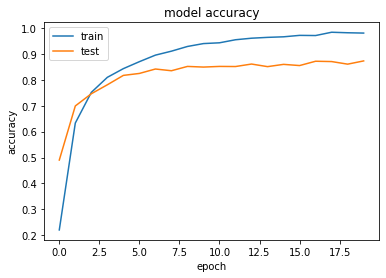

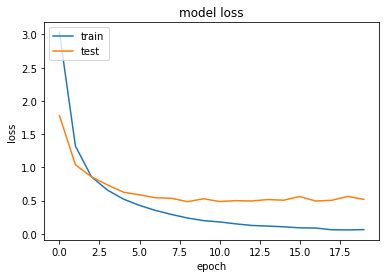

In [38]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights(project_dir+"model.h5")
print("Loaded model from disk")

Loaded model from disk


In [18]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

94/94 [==============================] - 1s 11ms/step - loss: 3.9131 - accuracy: 0.0223
accuracy: 2.23%
